In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import plotly.express as px

In [3]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv", sep=",")

In [4]:
df.head()

VIN (1-10)     County     City State  Postal Code  Model Year    Make  \
0  3C3CFFGE4E     Yakima   Yakima    WA      98902.0        2014    FIAT   
1  5YJXCBE40H   Thurston  Olympia    WA      98513.0        2017   TESLA   
2  3MW39FS03P       King   Renton    WA      98058.0        2023     BMW   
3  7PDSGABA8P  Snohomish  Bothell    WA      98012.0        2023  RIVIAN   
4  5YJ3E1EB8L       King     Kent    WA      98031.0        2020   TESLA   

     Model                   Electric Vehicle Type  \
0      500          Battery Electric Vehicle (BEV)   
1  MODEL X          Battery Electric Vehicle (BEV)   
2     330E  Plug-in Hybrid Electric Vehicle (PHEV)   
3      R1S          Battery Electric Vehicle (BEV)   
4  MODEL 3          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible              87   
1            Clean Alternative Fuel Vehicle Eligible             200   
2              Not eligible due to low battery range              20   
3  Eligibility unknown as battery range has not b...               0   
4            Clean Alternative Fuel Vehicle Eligible             322   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  14.0         1593721   
1          0                   2.0       257167501   
2          0                  11.0       224071816   
3          0                  21.0       260084653   
4          0                  33.0       253771913   

                  Vehicle Location  \
0   POINT (-120.524012 46.5973939)   
1     POINT (-122.817545 46.98876)   
2  POINT (-122.1298876 47.4451257)   
3      POINT (-122.1873 47.820245)   
4  POINT (-122.2012521 47.3931814)   

                                Electric Utility  2020 Census Tract  
0                                     PACIFICORP       5.307700e+10  
1                         PUGET SOUND ENERGY INC       5.306701e+10  
2  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10  
3                         PUGET SOUND ENERGY INC       5.306105e+10  
4  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         166800 non-null  object 
 1   County                                             166795 non-null  object 
 2   City                                               166795 non-null  object 
 3   State                                              166800 non-null  object 
 4   Postal Code                                        166795 non-null  float64
 5   Model Year                                         166800 non-null  int64  
 6   Make                                               166800 non-null  object 
 7   Model                                              166800 non-null  object 
 8   Electric Vehicle Type                              166800 non-null  object

In [6]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 360
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [7]:
df.dropna(inplace=True)
df

VIN (1-10)     County        City State  Postal Code  Model Year  \
0       3C3CFFGE4E     Yakima      Yakima    WA      98902.0        2014   
1       5YJXCBE40H   Thurston     Olympia    WA      98513.0        2017   
2       3MW39FS03P       King      Renton    WA      98058.0        2023   
3       7PDSGABA8P  Snohomish     Bothell    WA      98012.0        2023   
4       5YJ3E1EB8L       King        Kent    WA      98031.0        2020   
...            ...        ...         ...   ...          ...         ...   
166795  3FA6P0SU4D    Spokane     Spokane    WA      99223.0        2013   
166796  5YJYGDEE5M       King   Sammamish    WA      98074.0        2021   
166797  7SAYGDEE5N  Snohomish    Mukilteo    WA      98275.0        2022   
166798  1G1RH6E43D      Lewis   Mossyrock    WA      98564.0        2013   
166799  5YJSA1E27H     Pierce  Gig Harbor    WA      98332.0        2017   

             Make    Model                   Electric Vehicle Type  \
0            FIAT      500          Battery Electric Vehicle (BEV)   
1           TESLA  MODEL X          Battery Electric Vehicle (BEV)   
2             BMW     330E  Plug-in Hybrid Electric Vehicle (PHEV)   
3          RIVIAN      R1S          Battery Electric Vehicle (BEV)   
4           TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
...           ...      ...                                     ...   
166795       FORD   FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
166796      TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
166797      TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
166798  CHEVROLET     VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
166799      TESLA  MODEL S          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible              87   
1                 Clean Alternative Fuel Vehicle Eligible             200   
2                   Not eligible due to low battery range              20   
3       Eligibility unknown as battery range has not b...               0   
4                 Clean Alternative Fuel Vehicle Eligible             322   
...                                                   ...             ...   
166795              Not eligible due to low battery range              19   
166796  Eligibility unknown as battery range has not b...               0   
166797  Eligibility unknown as battery range has not b...               0   
166798            Clean Alternative Fuel Vehicle Eligible              38   
166799            Clean Alternative Fuel Vehicle Eligible             210   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                  14.0         1593721   
1               0                   2.0       257167501   
2               0                  11.0       224071816   
3               0                  21.0       260084653   
4               0                  33.0       253771913   
...           ...                   ...             ...   
166795          0                   6.0       239527123   
166796          0                  45.0       148715479   
166797          0                  21.0       220504406   
166798          0                  20.0       156418475   
166799          0                  26.0       169045789   

                       Vehicle Location  \
0        POINT (-120.524012 46.5973939)   
1          POINT (-122.817545 46.98876)   
2       POINT (-122.1298876 47.4451257)   
3           POINT (-122.1873 47.820245)   
4       POINT (-122.2012521 47.3931814)   
...                                 ...   
166795     POINT (-117.369705 47.62637)   
166796  POINT (-122.0313266 47.6285782)   
166797     POINT (-122.299965 47.94171)   
166798   POINT (-122.487535 46.5290135)   
166799    POINT (-122.589645 47.342345)   

                                         Electric Utility  2020 Census Tract  
0                       

In [8]:
dfMean = df.groupby('Make').agg({'Electric Range':'mean'})
dfMean

Electric Range
Make                                
ALFA ROMEO                 33.000000
AUDI                       52.094907
AZURE DYNAMICS             56.000000
BENTLEY                    19.666667
BMW                        35.665645
CADILLAC                   13.563786
CHEVROLET                  95.035337
CHRYSLER                   32.218848
DODGE                      32.000000
FIAT                       85.625468
FISKER                     17.111111
FORD                       11.484866
GENESIS                     0.000000
GMC                         0.000000
HONDA                      46.590965
HYUNDAI                    20.606076
JAGUAR                    203.294118
JEEP                       22.341565
KIA                        47.304267
LAND ROVER                 23.923077
LEXUS                      19.403909
LINCOLN                    23.573123
LUCID                       0.000000
MAZDA                      25.864583
MERCEDES-BENZ               8.149142
MINI                       18.894614
MITSUBISHI                 30.488298
NISSAN                     81.542609
POLESTAR                   38.559859
PORSCHE                    45.797445
RIVIAN                      0.000000
SMART                      62.356364
SUBARU                      1.425667
TESLA                      81.165254
TH!NK                     100.000000
TOYOTA                     27.524394
VOLKSWAGEN                 24.378666
VOLVO                      15.910976
WHEEGO ELECTRIC CARS      100.000000

In [9]:
#alphabetize the 'makes' of the cars
df = df.sort_values(by='Make')

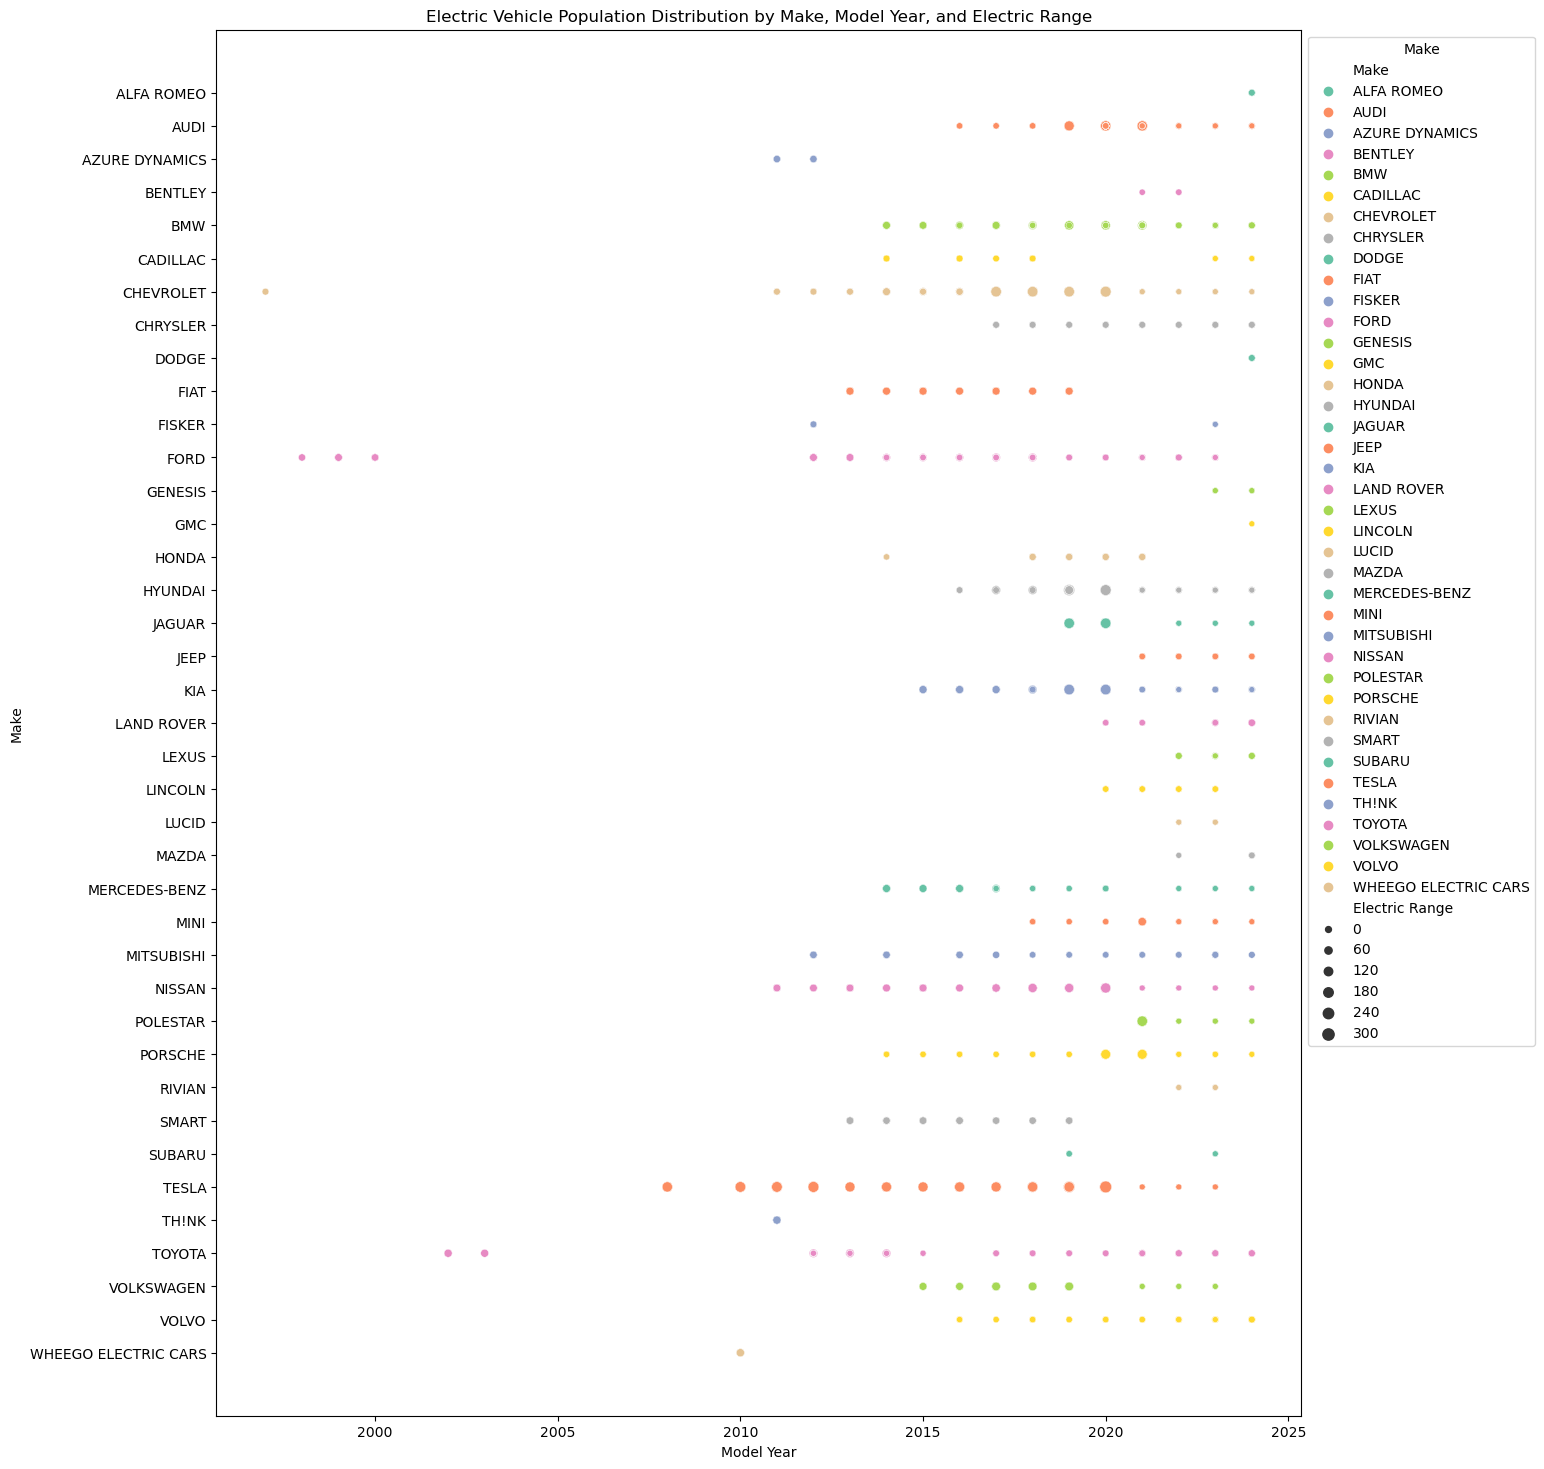

In [103]:
# Scatter plot with color differentiation based on 'make'
plt.figure(figsize=(14, 18))
sns.scatterplot(x='Model Year', y='Make', hue='Make', data=df, palette='Set2', s=300, size="Electric Range")
plt.title('Electric Vehicle Population Distribution by Make, Model Year, and Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Make')
plt.legend(title='Make', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

In [11]:
df['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            130053
Plug-in Hybrid Electric Vehicle (PHEV)     36382
Name: count, dtype: int64

In [12]:
#Extracting longitude and latitude from the "Vehicle Location" column
df['Vehicle Location'] = df['Vehicle Location'].str.replace('POINT ', '')  # Remove 'POINT'
df['Vehicle Location'] = df['Vehicle Location'].str.replace('(', '')  # Remove '('
df['Vehicle Location'] = df['Vehicle Location'].str.replace(')', '')  # Remove ')'
df[['longitude', 'latitude']] = df['Vehicle Location'].str.split(expand=True)

# Convert longitude and latitude to float
df['longitude'] = df['longitude'].astype(float)
df['latitude'] = df['latitude'].astype(float)

In [13]:
df.head()

VIN (1-10)     County      City State  Postal Code  Model Year  \
62316   ZASPATDW7R  Snohomish  Mukilteo    WA      98275.0        2024   
487     ZASPATCW4R       King  Kirkland    WA      98033.0        2024   
30454   ZASPATDW8R       King   Seattle    WA      98109.0        2024   
25477   ZASPATDW1R  Snohomish   Bothell    WA      98012.0        2024   
154150  ZASPATDW4R  Snohomish  Mukilteo    WA      98275.0        2024   

              Make   Model                   Electric Vehicle Type  \
62316   ALFA ROMEO  TONALE  Plug-in Hybrid Electric Vehicle (PHEV)   
487     ALFA ROMEO  TONALE  Plug-in Hybrid Electric Vehicle (PHEV)   
30454   ALFA ROMEO  TONALE  Plug-in Hybrid Electric Vehicle (PHEV)   
25477   ALFA ROMEO  TONALE  Plug-in Hybrid Electric Vehicle (PHEV)   
154150  ALFA ROMEO  TONALE  Plug-in Hybrid Electric Vehicle (PHEV)   

       Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
62316            Clean Alternative Fuel Vehicle Eligible              33   
487              Clean Alternative Fuel Vehicle Eligible              33   
30454            Clean Alternative Fuel Vehicle Eligible              33   
25477            Clean Alternative Fuel Vehicle Eligible              33   
154150           Clean Alternative Fuel Vehicle Eligible              33   

        Base MSRP  Legislative District  DOL Vehicle ID      Vehicle Location  \
62316           0                  21.0       249725010  -122.299965 47.94171   
487             0                  48.0       258582068    -122.20264 47.6785   
30454           0                  36.0       260693198  -122.34848 47.632405   
25477           0                  44.0       259110918   -122.1873 47.820245   
154150          0                  21.0       257807098  -122.299965 47.94171   

                                     Electric Utility  2020 Census Tract  \
62316                          PUGET SOUND ENERGY INC       5.306104e+10   
487     PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10   
30454    CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10   
25477                          PUGET SOUND ENERGY INC       5.306105e+10   
154150                         PUGET SOUND ENERGY INC       5.306104e+10   

         longitude   latitude  
62316  -122.299965  47.941710  
487    -122.202640  47.678500  
30454  -122.348480  47.632405  
25477  -122.187300  47.820245  
154150 -122.299965  47.941710

In [90]:
import pandas as pd

# Create a new column 'text_data' by concatenating values from multiple columns
df['text_data'] = df['Make'] + ' ' + df['Model'] + ' ' + df['County'] + ' ' + df['City']

# Display the DataFrame with the new column
print(df[['Make', 'Model', 'County', 'City', 'text_data']].head())


              Make   Model     County      City  \
62316   ALFA ROMEO  TONALE  Snohomish  Mukilteo   
487     ALFA ROMEO  TONALE       King  Kirkland   
30454   ALFA ROMEO  TONALE       King   Seattle   
25477   ALFA ROMEO  TONALE  Snohomish   Bothell   
154150  ALFA ROMEO  TONALE  Snohomish  Mukilteo   

                                   text_data  
62316   ALFA ROMEO TONALE Snohomish Mukilteo  
487          ALFA ROMEO TONALE King Kirkland  
30454         ALFA ROMEO TONALE King Seattle  
25477    ALFA ROMEO TONALE Snohomish Bothell  
154150  ALFA ROMEO TONALE Snohomish Mukilteo  


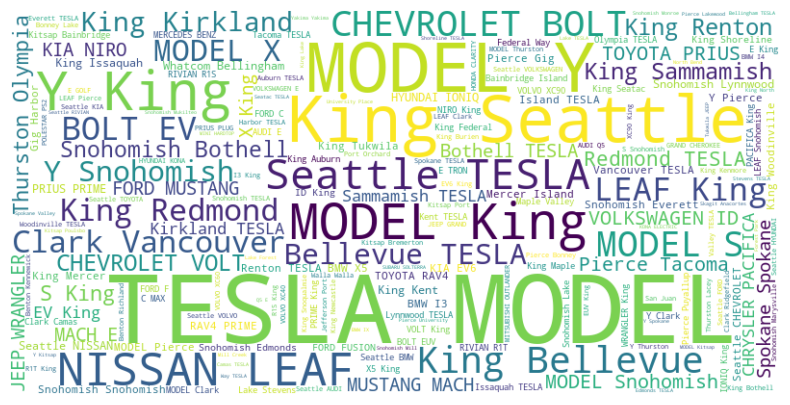

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'df' and it contains a column named 'text' with the text data

# Combine all text data into a single string
text = ' '.join(df['text_data'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

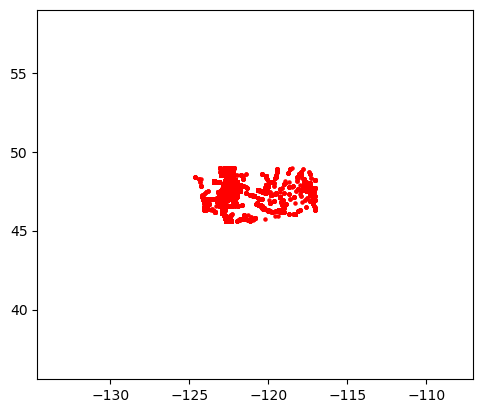

In [15]:
# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Load the shapefile for Washington state
wa = gpd.read_file('WA_State_Boundary.shp')  # Replace 'path_to_washington_shapefile.shp' with the actual path to the shapefile

# Plot the map
base = wa.plot(color='white', edgecolor='black')  # Plot Washington state as the base map

# Plot the GeoDataFrame on the map
gdf.plot(ax=base, marker='o', color='red', markersize=5)

# Set limits to zoom into Washington state
ymin = df['latitude'].min()
ymax = df['latitude'].max()
xmin = df['longitude'].min()
xmax= df['longitude'].max()

base.set_xlim(xmin -10, xmax+10)
base.set_ylim(ymin-10, ymax+10)

# Show the plot
plt.show()

C:\Users\soomy\AppData\Local\Temp\ipykernel_7528\860223842.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


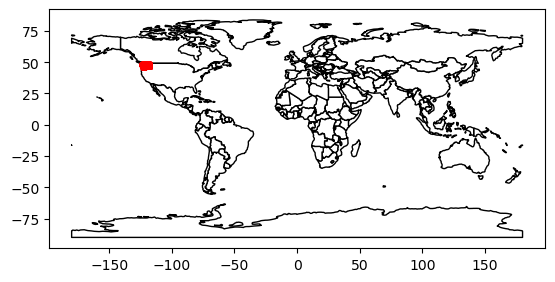

In [16]:
# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Plot the map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black')

# Plot the GeoDataFrame on the map
gdf.plot(ax=base, marker='o', color='red', markersize=5)

# Show the plot
plt.show()

C:\Users\soomy\AppData\Local\Temp\ipykernel_7528\1145532275.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='longitude', ylabel='latitude'>

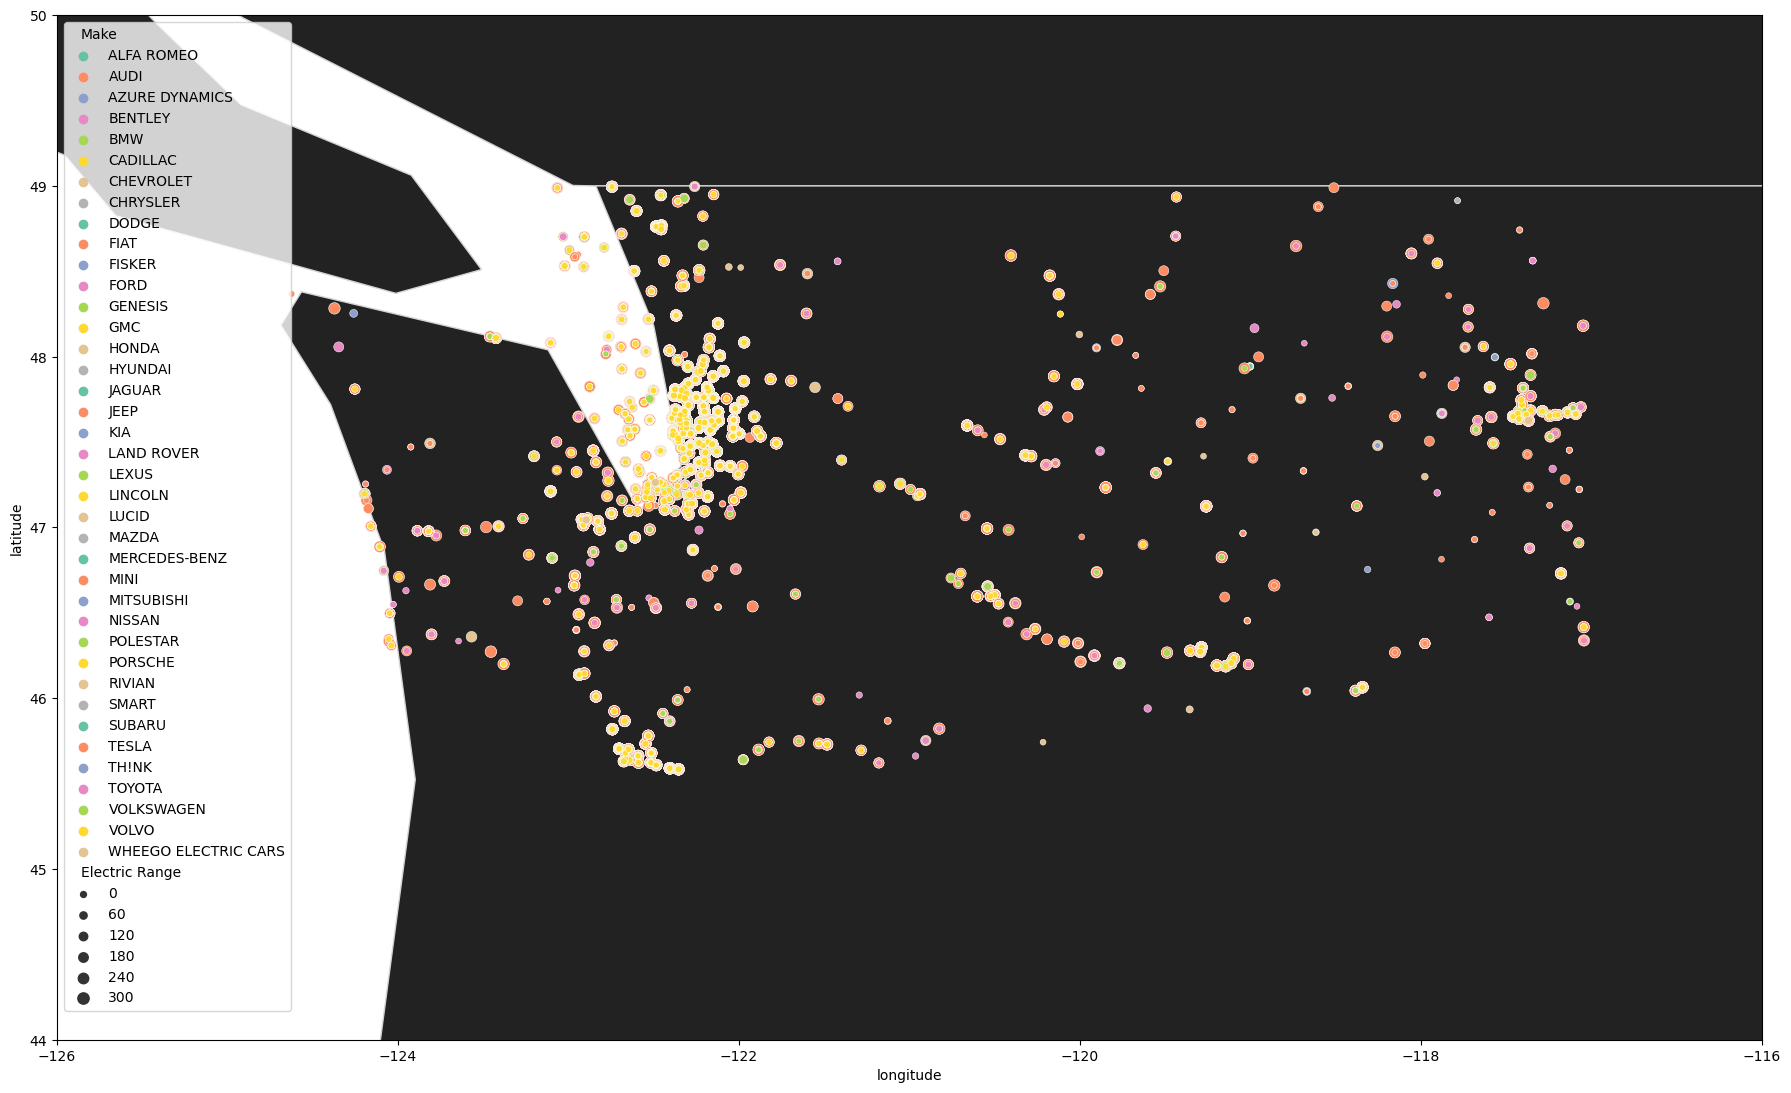

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the outlines
fig, ax = plt.subplots(figsize=(22,16))
world.plot(ax=ax, color='#222222', edgecolor='lightgray')

plt.legend(title='Make', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

#zoom into seattle, WA
ax.set_xlim(-126, -116)
ax.set_ylim(44, 50)

sns.scatterplot(data=df, x='longitude', y='latitude', hue='Make', palette='Set2', legend="brief", s=100, size = "Electric Range", ax=ax)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


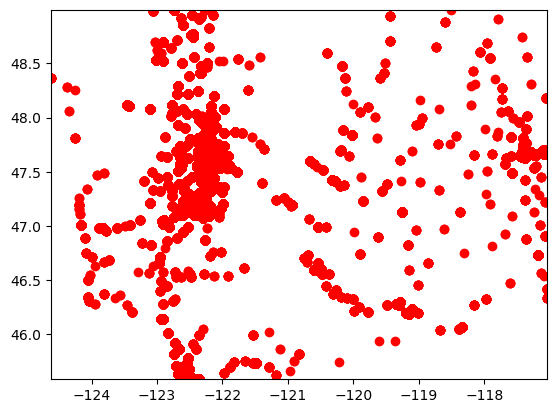

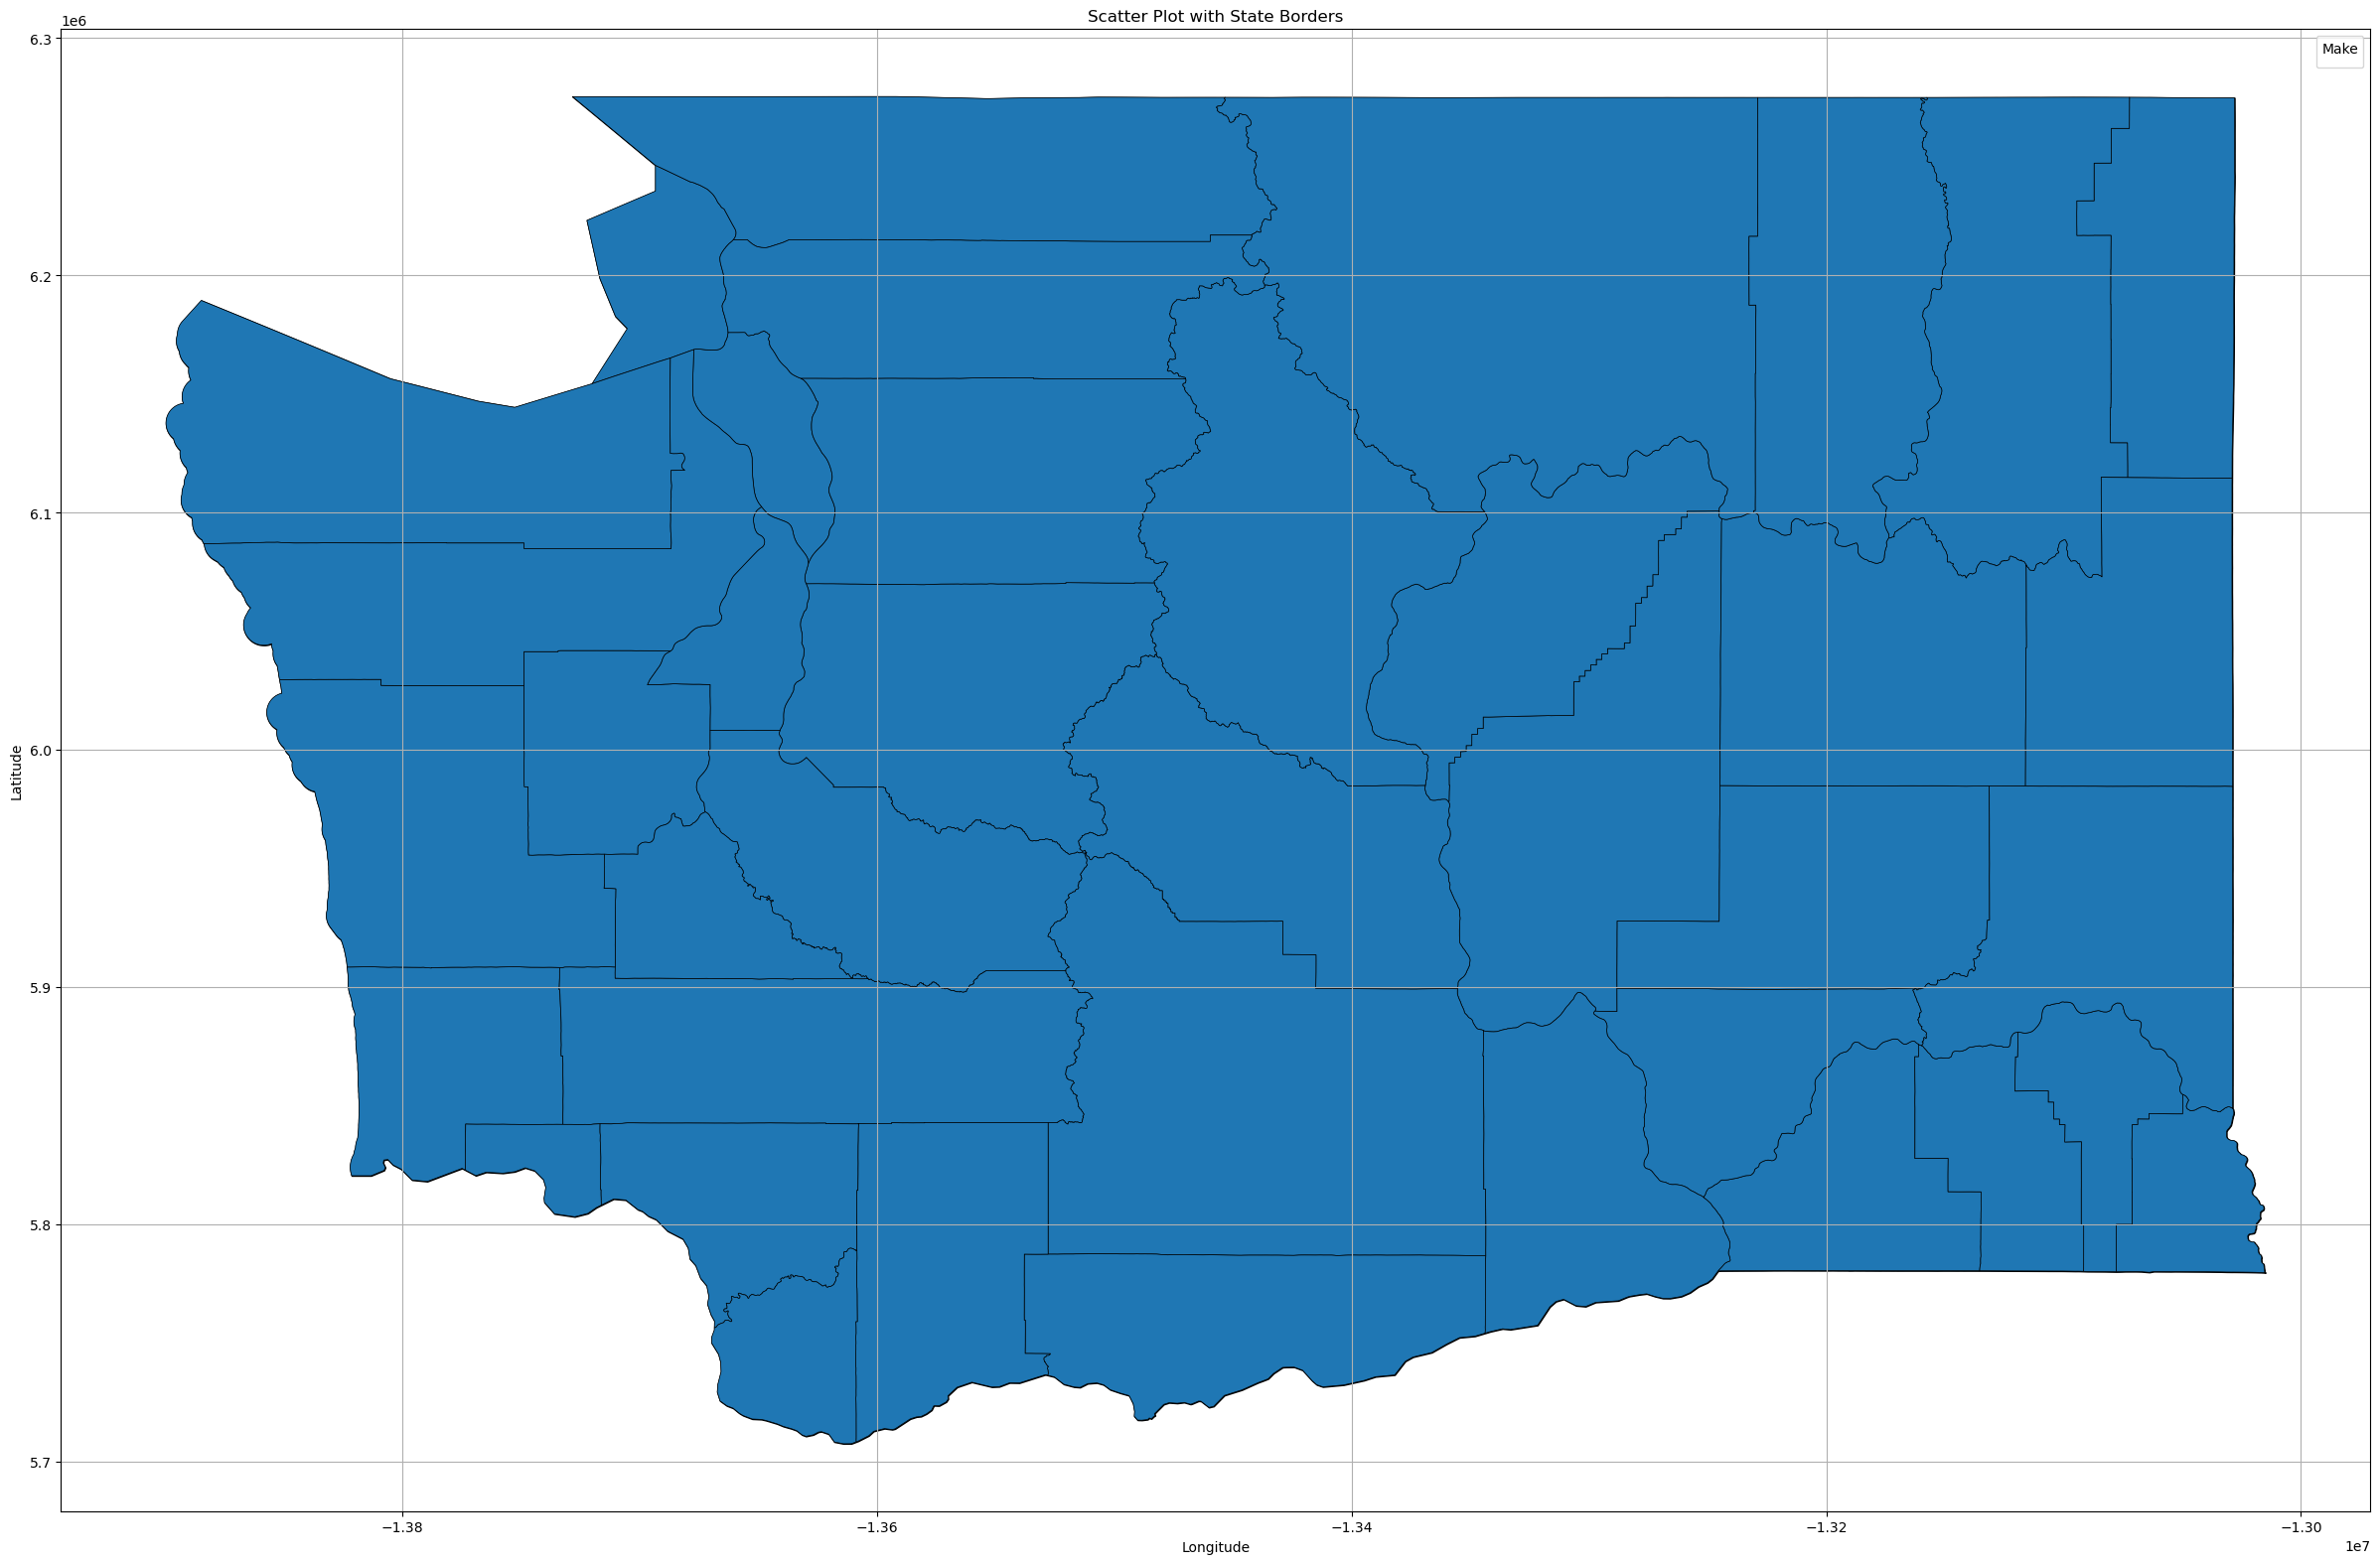

In [82]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the state borders data
state_borders = gpd.read_file("WA_State_Boundary.shp")

# Load the county boundaries data
washington_counties = gpd.read_file("WA_County_Boundaries.shp")

# Example data for scatter plot
# Let's assume you have a DataFrame named 'data' with columns 'longitude' and 'latitude'

#zoom into seattle, WA
# Determine the range of longitude and latitude values in your dataset
min_longitude = df['longitude'].min()
max_longitude = df['longitude'].max()
min_latitude = df['latitude'].min()
max_latitude = df['latitude'].max()

# Set plot limits based on the range of longitude and latitude values
plt.xlim(min_longitude, max_longitude)
plt.ylim(min_latitude, max_latitude)

plt.scatter(df['longitude'], df['latitude'], color='red', marker='o', label='Dataset Points')


# Create a scatter plot with Seaborn
plt.figure(figsize=(30, 22))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='Make', palette='magma', legend="brief", s=100, size = "Electric Range", ax=ax)

# Plot state and county borders
state_borders.plot(ax=plt.gca(), edgecolor='black', linewidth=1)
washington_counties.plot(ax=plt.gca(), edgecolor='black', linewidth=0.5)


# Set plot title and labels
plt.title('Scatter Plot with State Borders')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Make')
plt.grid(True)
plt.show()


Shapefile CRS: EPSG:3857
Scatterplot Data CRS (before): None
Scatterplot Data CRS (after): EPSG:3857


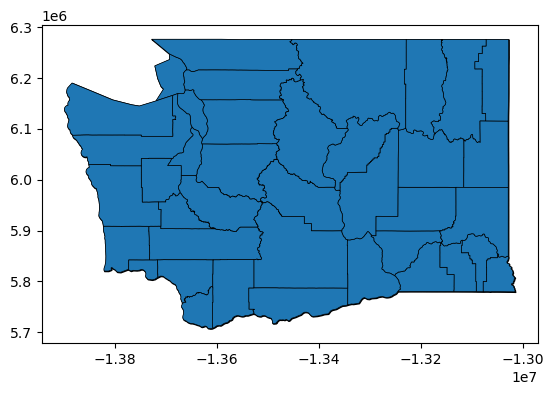

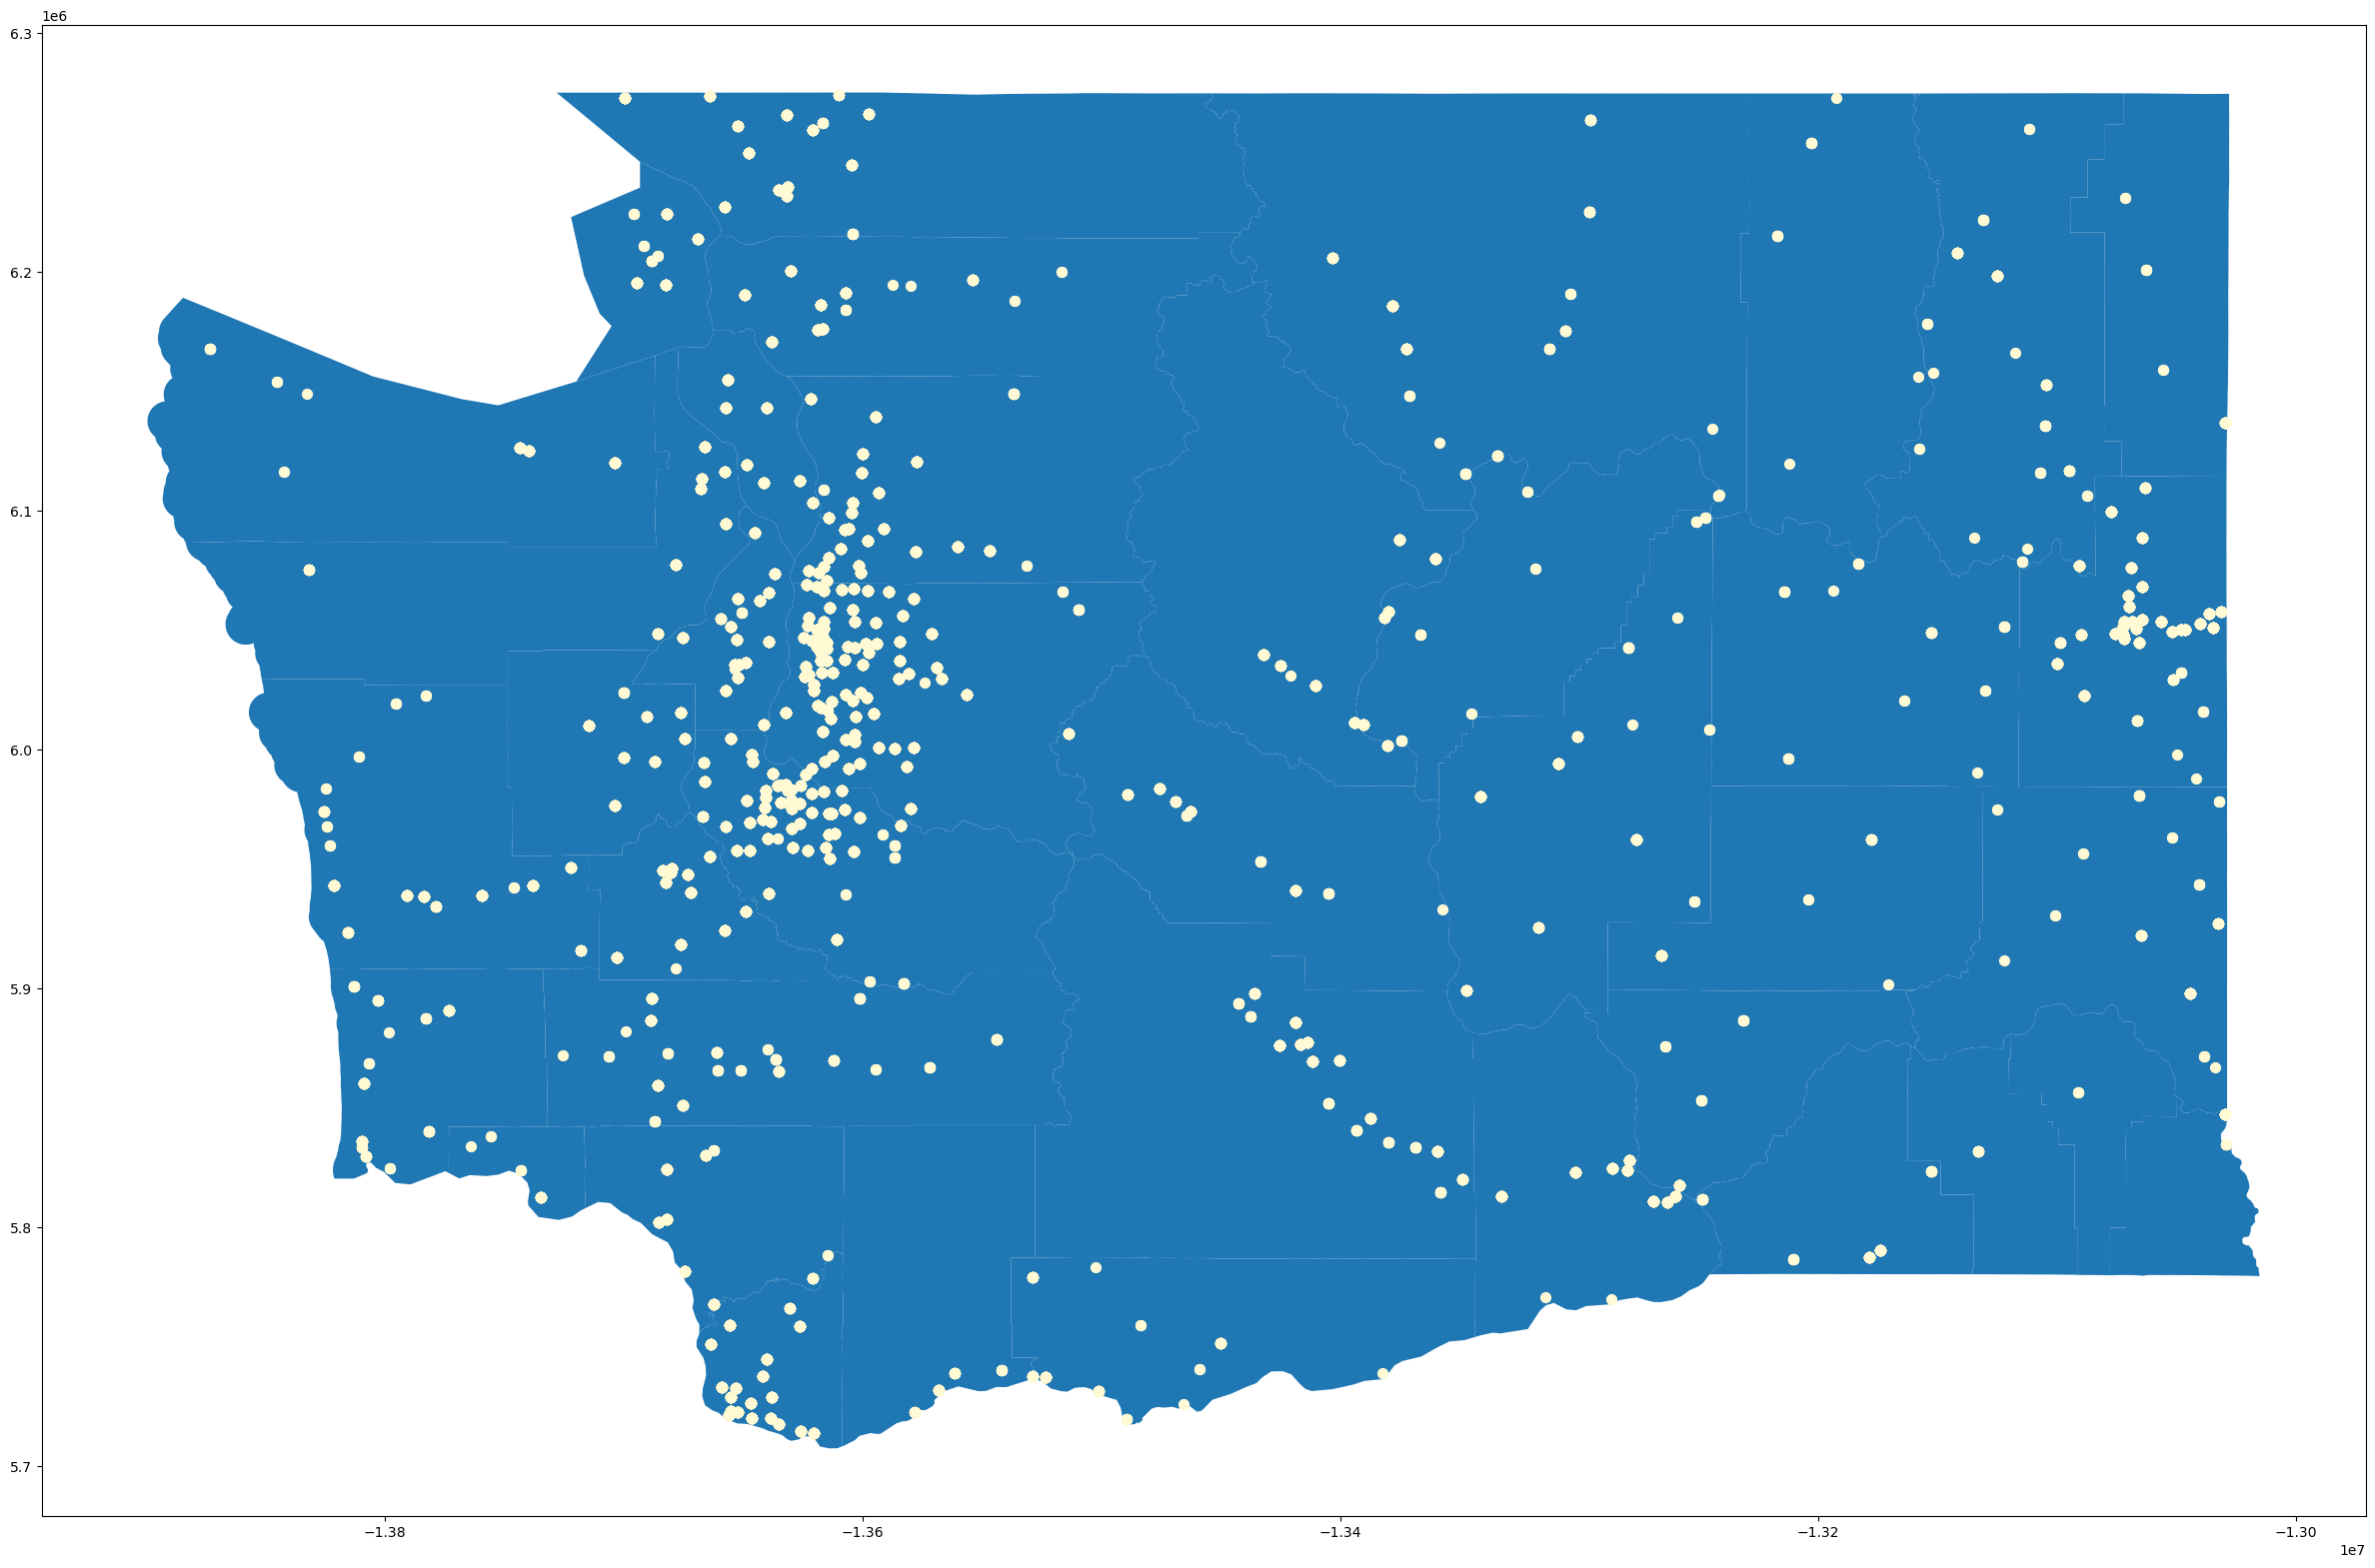

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from geopandas import GeoDataFrame

# Read the shapefile

shapefile = gpd.read_file('WA_County_Boundaries.shp')
print("Shapefile CRS:", shapefile.crs)
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
scatter_gdf = GeoDataFrame(df, geometry=geometry)

# Check the CRS of the scatterplot data
print("Scatterplot Data CRS (before):", scatter_gdf.crs)
scatter_gdf.crs = "EPSG:4326"
scatter_gdf = scatter_gdf.to_crs(shapefile.crs)

# Plot state and county borders
state_borders.plot(ax=plt.gca(), edgecolor='black', linewidth=1)
washington_counties.plot(ax=plt.gca(), edgecolor='black', linewidth=0.5)


# Check the CRS of the scatterplot data after transformation
print("Scatterplot Data CRS (after):", scatter_gdf.crs)
ax = shapefile.plot(figsize=(30, 22))
scatter_gdf.plot(ax=ax, color='#fff9d4', marker='o', markersize=50)
plt.show()


Shapefile CRS: EPSG:3857
Scatterplot Data CRS (before): None
Scatterplot Data CRS (after): EPSG:3857


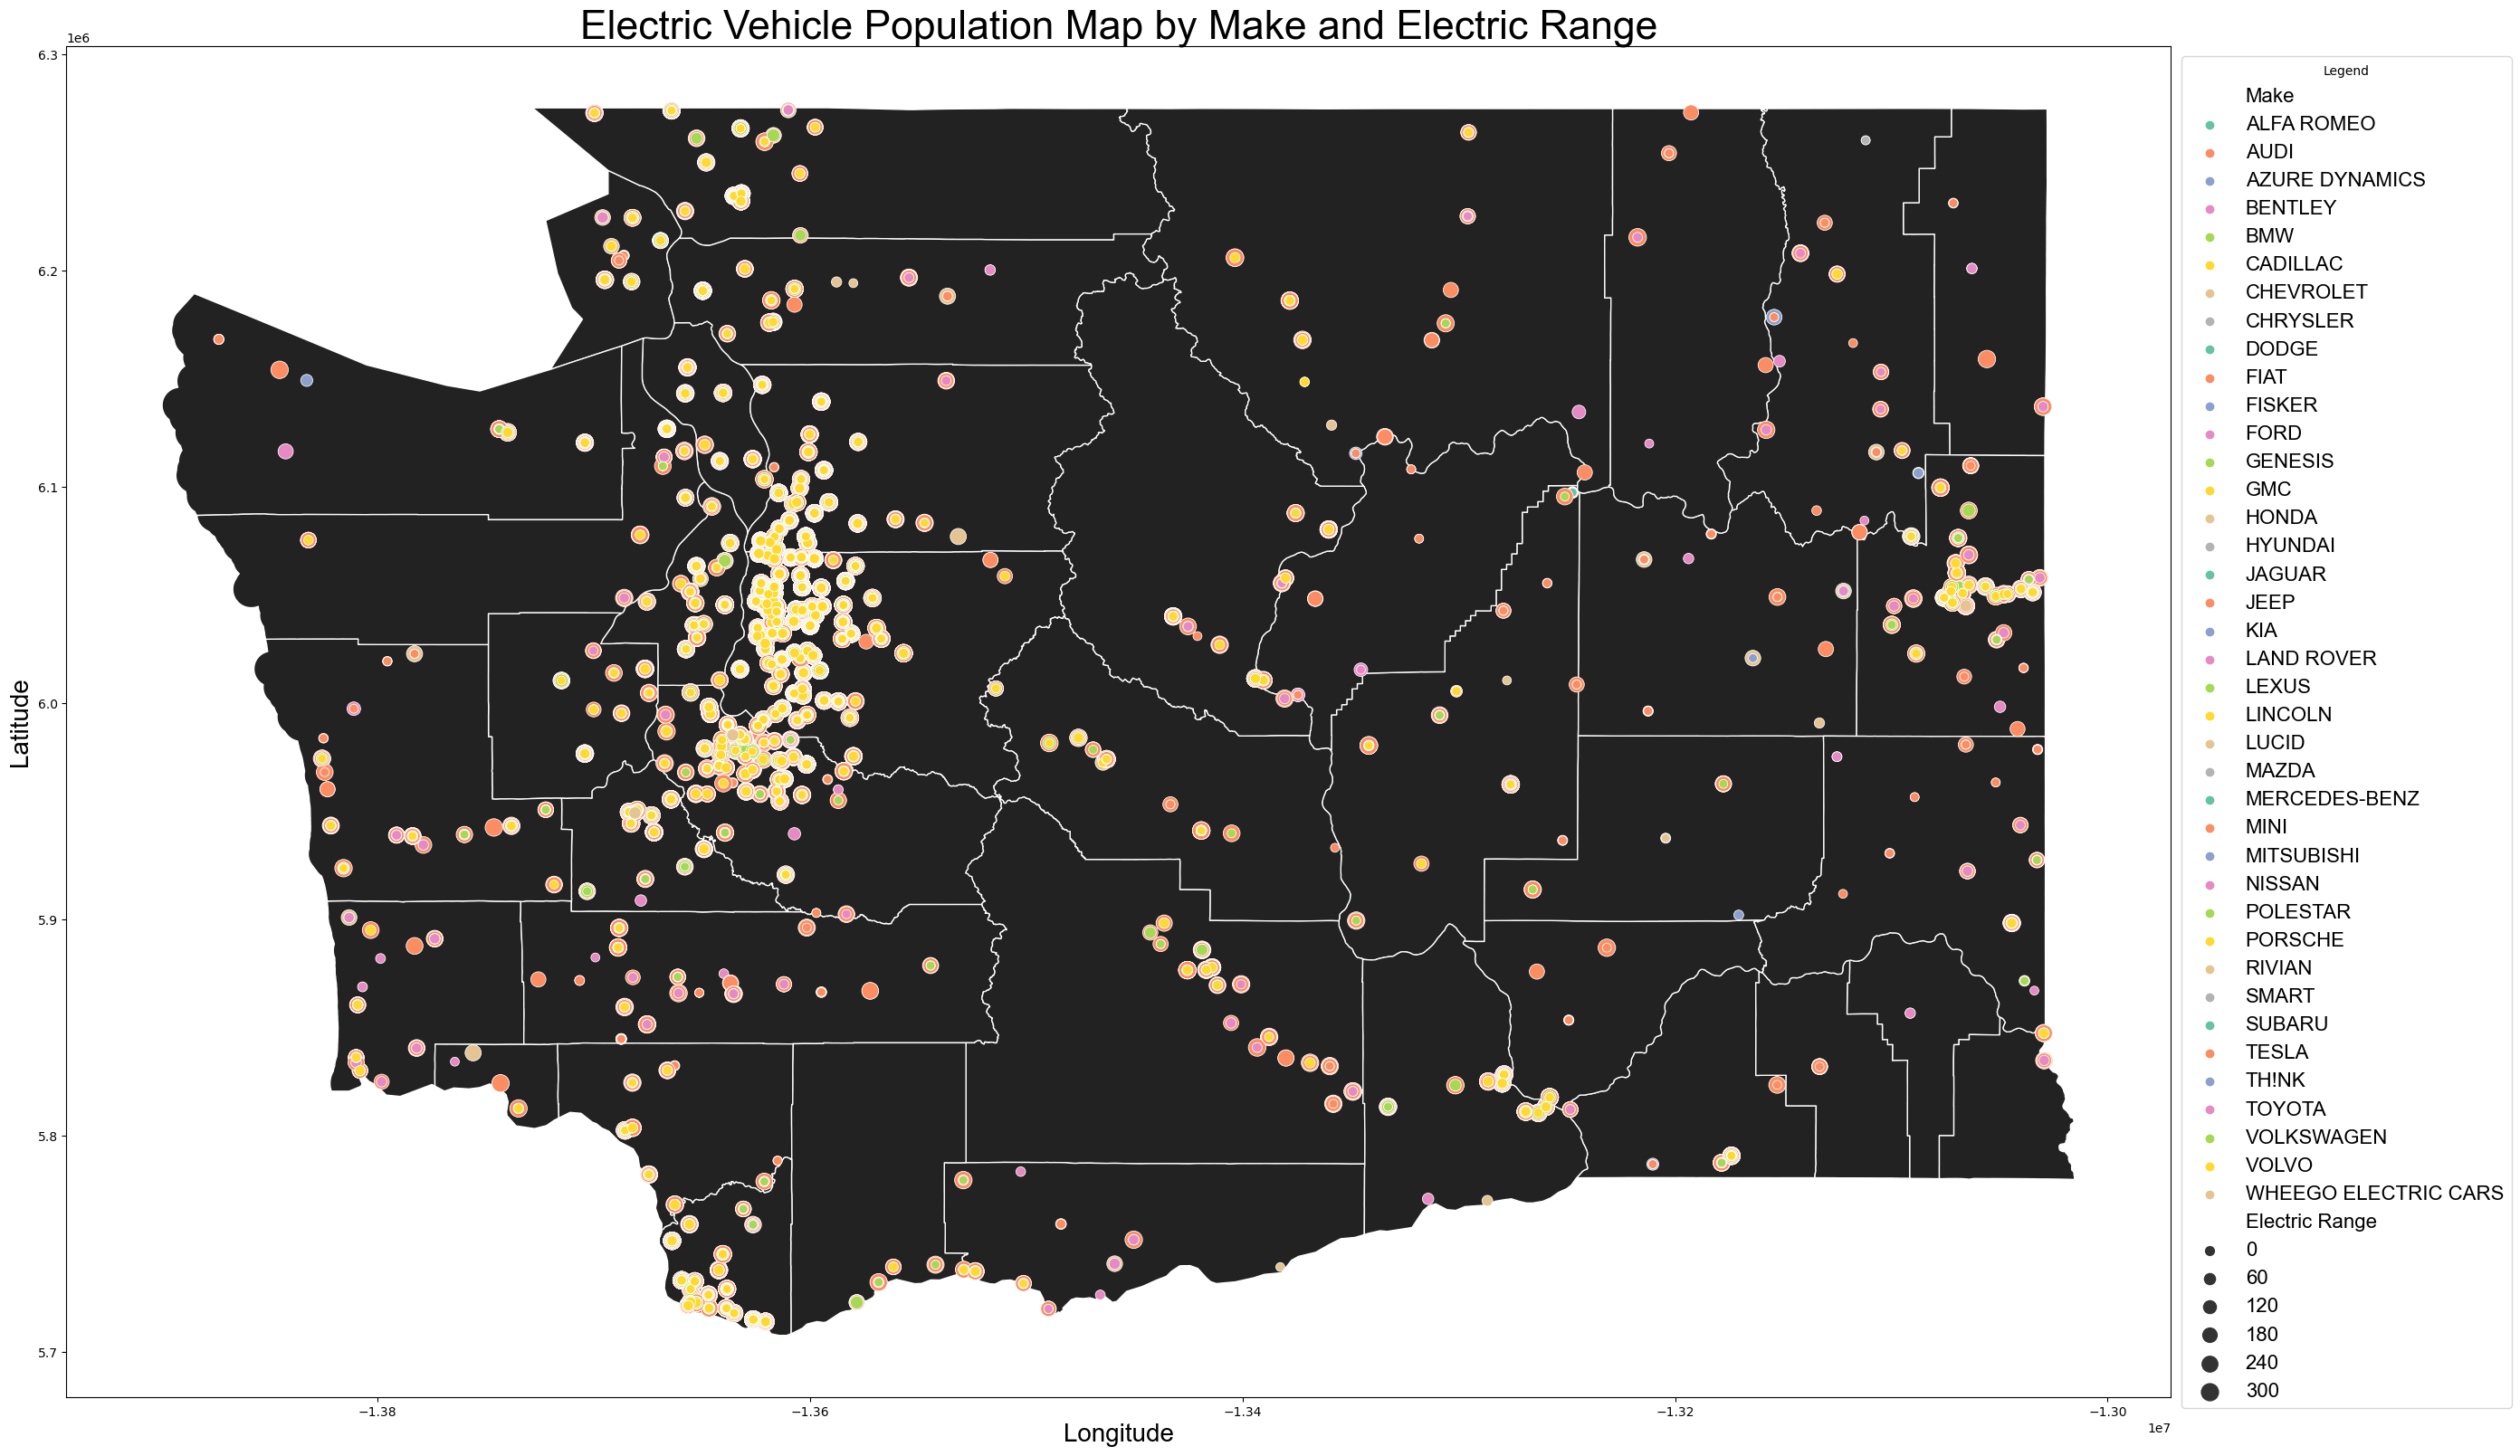

In [73]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from geopandas import GeoDataFrame

# Read the shapefile
shapefile = gpd.read_file('WA_County_Boundaries.shp')

print("Shapefile CRS:", shapefile.crs)

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
scatter_gdf = GeoDataFrame(df, geometry=geometry)

print("Scatterplot Data CRS (before):", scatter_gdf.crs)

scatter_gdf.crs = "EPSG:4326"

scatter_gdf = scatter_gdf.to_crs(shapefile.crs)

print("Scatterplot Data CRS (after):", scatter_gdf.crs)

scatter_gdf['x'] = scatter_gdf['geometry'].x
scatter_gdf['y'] = scatter_gdf['geometry'].y

# Plot the shapefile
ax = shapefile.plot(figsize=(30, 26), facecolor = "#222222", edgecolor = "white")

# Plot the scatterplot data, customizing color and size based on "Electric Range"
sns.scatterplot(x='x', y='y', hue="Make", data=scatter_gdf, palette='Set2', size='Electric Range', sizes=(50, 200), legend='brief', ax=ax)

# Add legend
label_font = {'family': 'Arial', 'size': 18}
title_font = {'family': 'Arial', 'size': 56}
legend_font = title_font = {'family': 'Arial', 'size': 16}
plt.legend(title='Legend', loc='upper left', bbox_to_anchor=(1, 1), prop=legend_font)
plt.title("Electric Vehicle Population Map by Make and Electric Range", fontdict=title_font,fontsize = 32)
plt.gca().set_xlabel('Longitude', fontdict=label_font, fontsize=20)
plt.gca().set_ylabel('Latitude', fontdict=label_font, fontsize=20)

plt.show()



Shapefile CRS: EPSG:3857
Scatterplot Data CRS (before): None
Scatterplot Data CRS (after): EPSG:3857


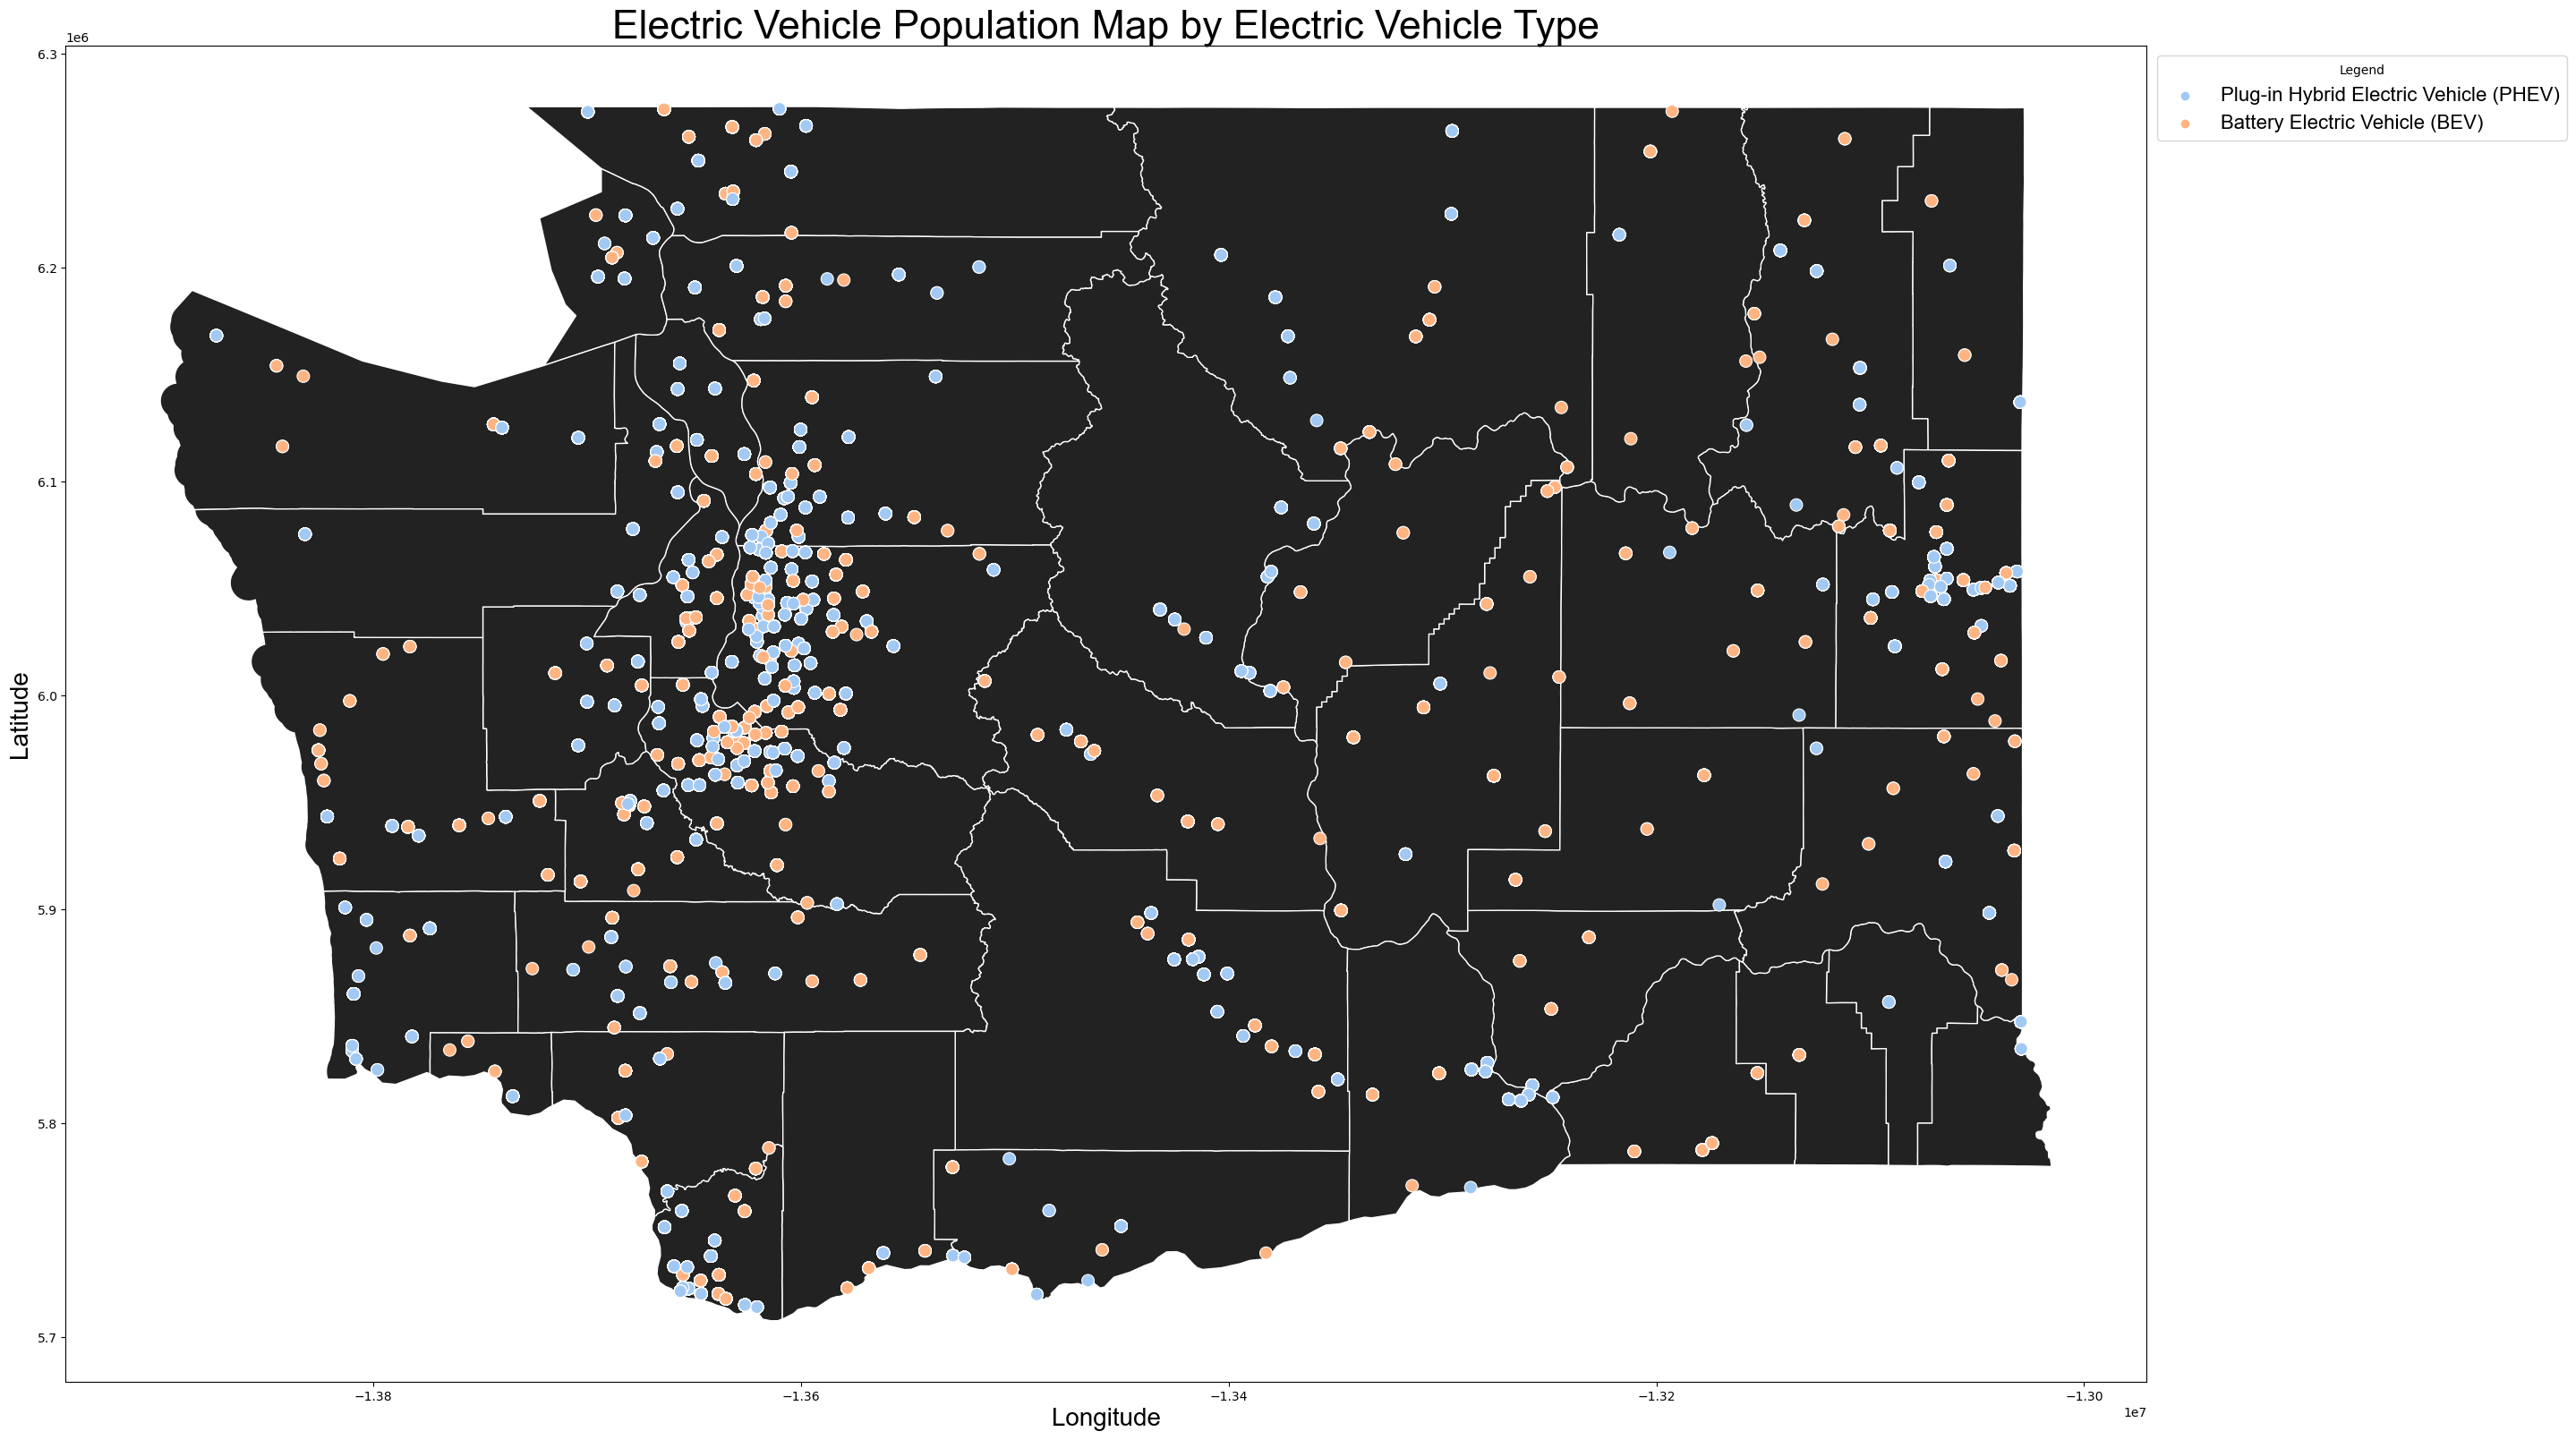

In [95]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from geopandas import GeoDataFrame

# Read the shapefile
shapefile = gpd.read_file('WA_County_Boundaries.shp')

print("Shapefile CRS:", shapefile.crs)

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
scatter_gdf = GeoDataFrame(df, geometry=geometry)

print("Scatterplot Data CRS (before):", scatter_gdf.crs)

scatter_gdf.crs = "EPSG:4326"

scatter_gdf = scatter_gdf.to_crs(shapefile.crs)

print("Scatterplot Data CRS (after):", scatter_gdf.crs)

scatter_gdf['x'] = scatter_gdf['geometry'].x
scatter_gdf['y'] = scatter_gdf['geometry'].y

# Plot the shapefile
ax = shapefile.plot(figsize=(30, 26), facecolor = "#222222", edgecolor = "white")

# Plot the scatterplot data, customizing color and size based on "Electric Range"
sns.scatterplot(x='x', y='y', hue="Electric Vehicle Type", data=scatter_gdf, palette='pastel', s = 100, legend='brief', ax=ax)

# Add legend
label_font = {'family': 'Arial', 'size': 18}
title_font = {'family': 'Arial', 'size': 56}
legend_font = title_font = {'family': 'Arial', 'size': 16}
plt.legend(title="Legend", loc='upper left', bbox_to_anchor=(1, 1), prop=legend_font)
plt.title("Electric Vehicle Population Map by Electric Vehicle Type", fontdict=title_font,fontsize = 32)
plt.gca().set_xlabel('Longitude', fontdict=label_font, fontsize=20)
plt.gca().set_ylabel('Latitude', fontdict=label_font, fontsize=20)

plt.show()

Shapefile CRS: EPSG:3857
Scatterplot Data CRS (before): None
Scatterplot Data CRS (after): EPSG:3857


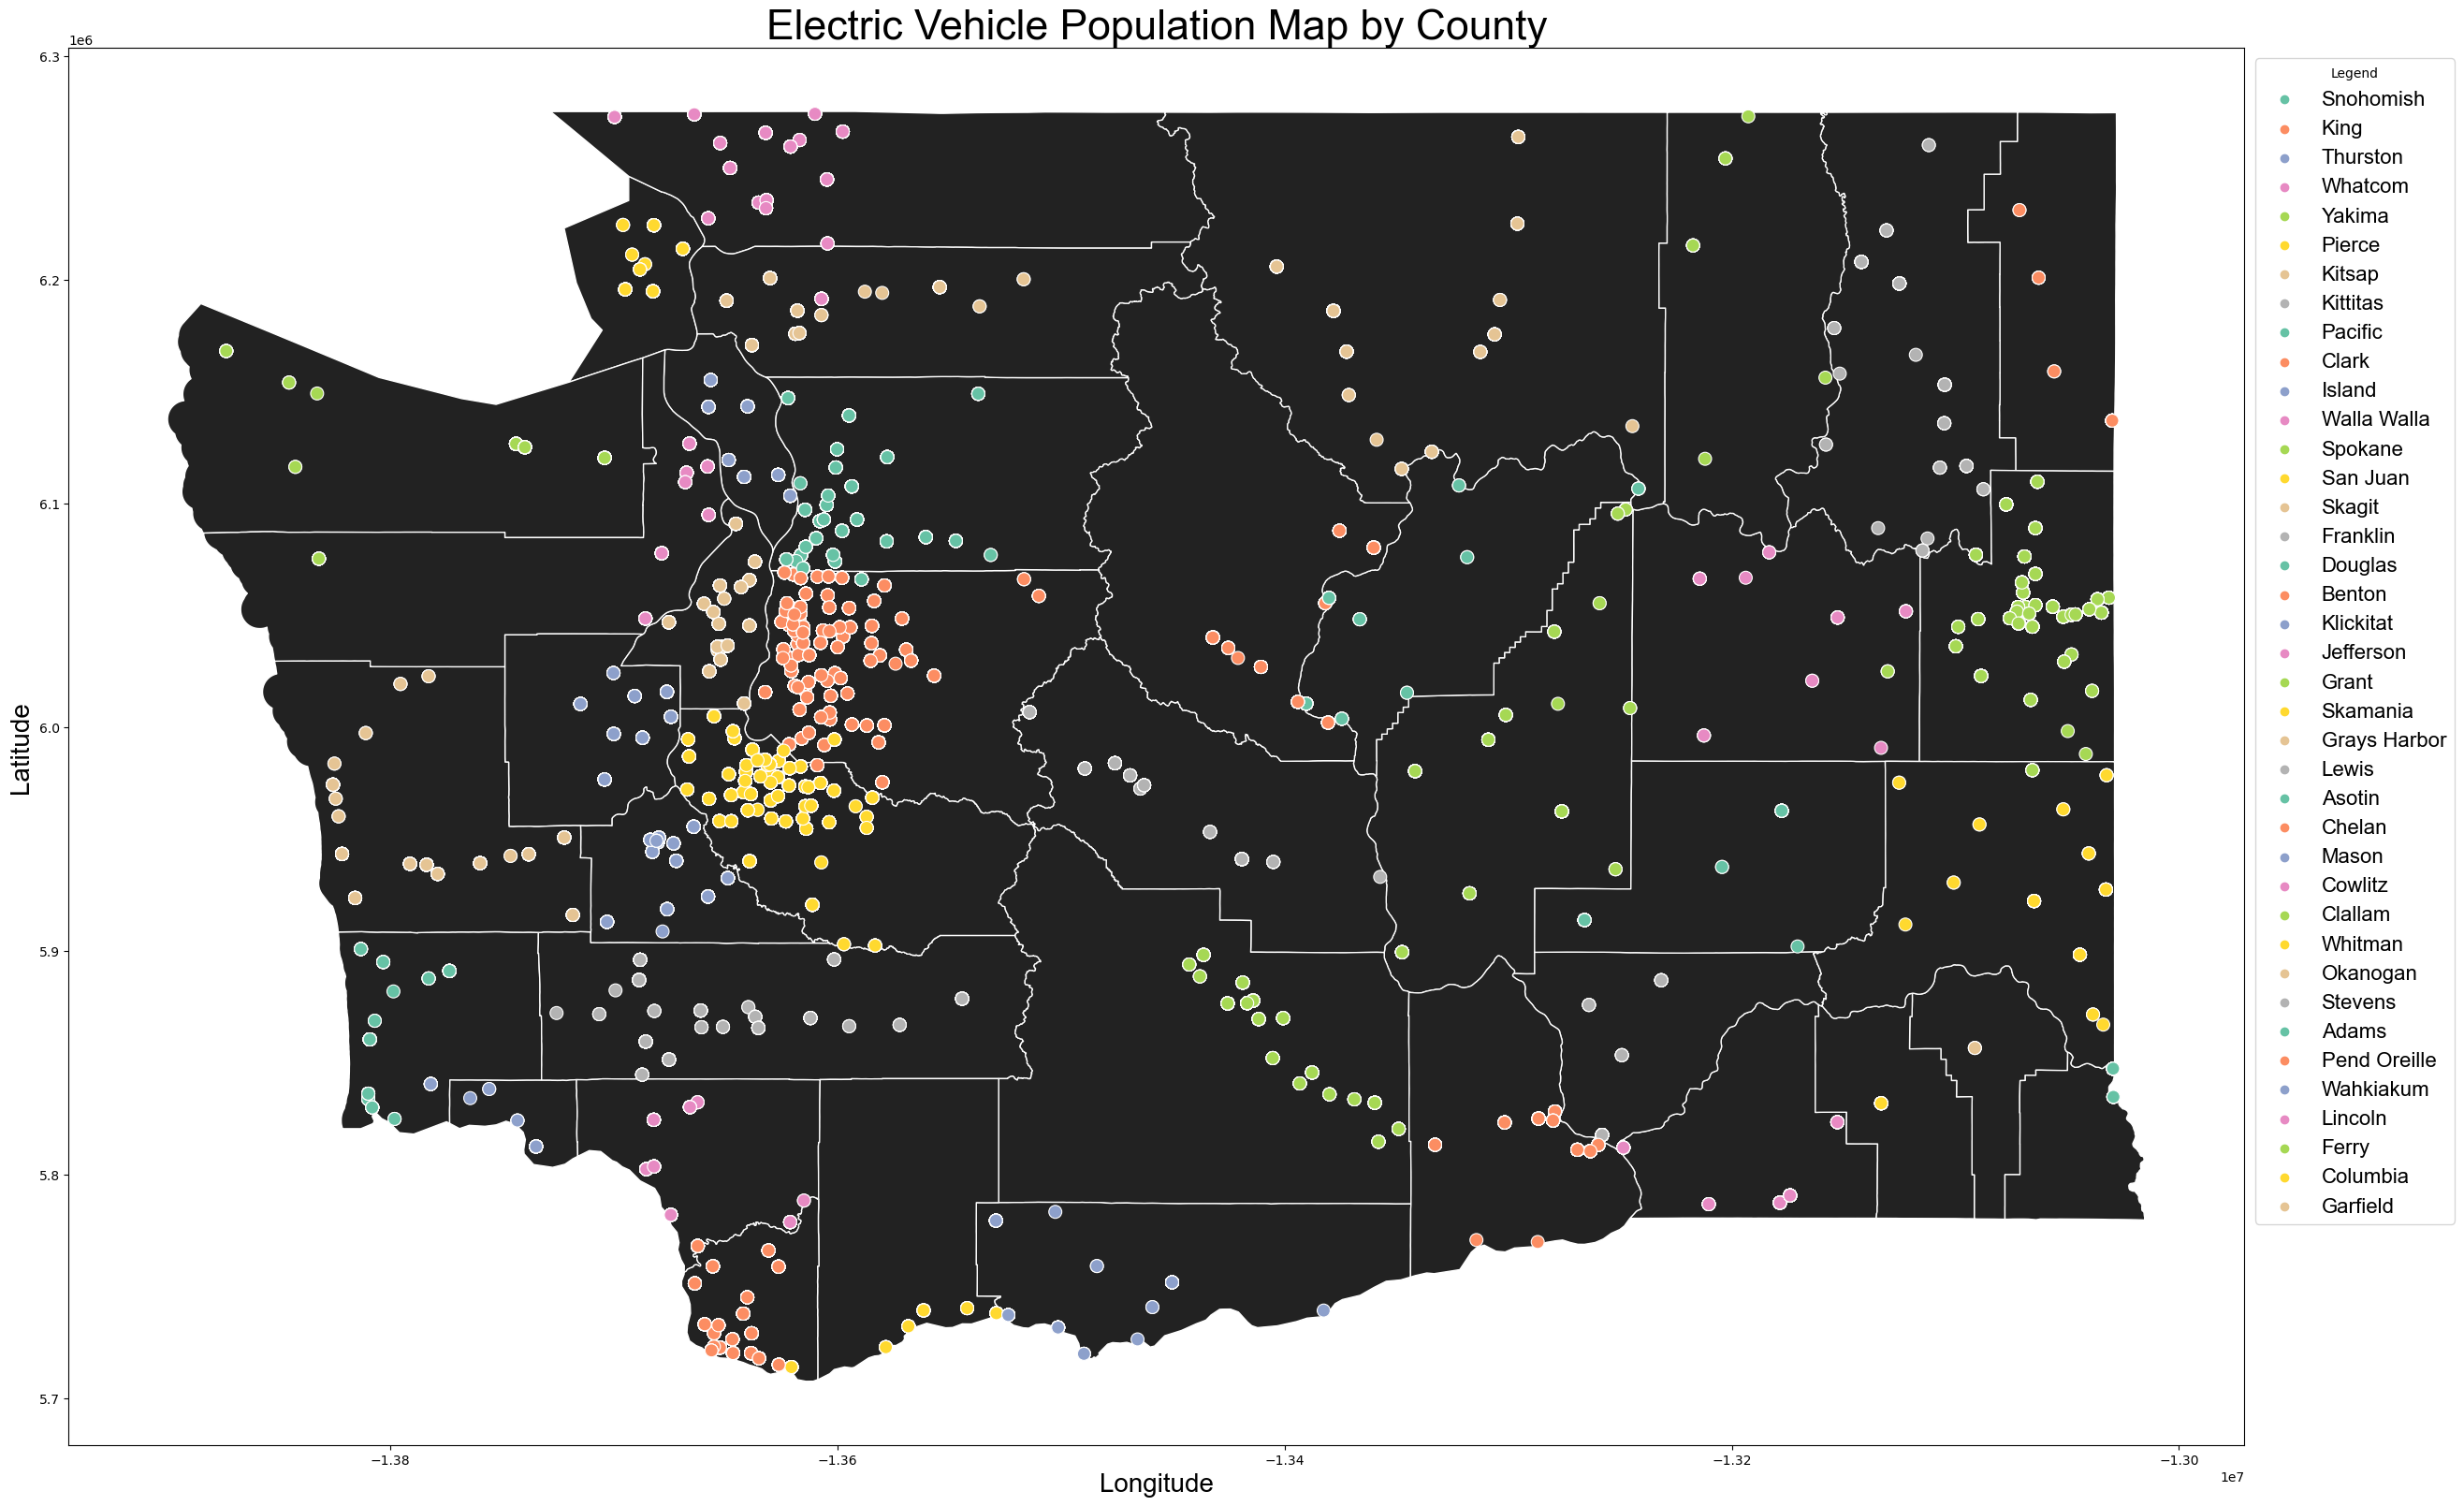

In [94]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from geopandas import GeoDataFrame

# Read the shapefile
shapefile = gpd.read_file('WA_County_Boundaries.shp')

print("Shapefile CRS:", shapefile.crs)

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
scatter_gdf = GeoDataFrame(df, geometry=geometry)

print("Scatterplot Data CRS (before):", scatter_gdf.crs)

scatter_gdf.crs = "EPSG:4326"

scatter_gdf = scatter_gdf.to_crs(shapefile.crs)

print("Scatterplot Data CRS (after):", scatter_gdf.crs)

scatter_gdf['x'] = scatter_gdf['geometry'].x
scatter_gdf['y'] = scatter_gdf['geometry'].y

# Plot the shapefile
ax = shapefile.plot(figsize=(30, 26), facecolor = "#222222", edgecolor = "white")

# Plot the scatterplot data, customizing color and size based on "Electric Range"
sns.scatterplot(x='x', y='y', hue="County", data=scatter_gdf, palette='Set2', s = 100, legend='brief', ax=ax)

# Add legend
label_font = {'family': 'Arial', 'size': 18}
title_font = {'family': 'Arial', 'size': 56}
legend_font = title_font = {'family': 'Arial', 'size': 16}
plt.legend(title="Legend", loc='upper left', bbox_to_anchor=(1, 1), prop=legend_font)
plt.title("Electric Vehicle Population Map by County", fontdict=title_font,fontsize = 32)
plt.gca().set_xlabel('Longitude', fontdict=label_font, fontsize=20)
plt.gca().set_ylabel('Latitude', fontdict=label_font, fontsize=20)

plt.show()

In [97]:
import pandas as pd

# Count the occurrences of each city and select the top 5 cities
top_cities = df['City'].value_counts().head(5).index.tolist()

# Create a new DataFrame containing data only for the top 5 cities
top_cities_df = df[df['City'].isin(top_cities)].copy()

# Display the new DataFrame
print(top_cities_df)


        VIN (1-10)     County      City State  Postal Code  Model Year  \
30454   ZASPATDW8R       King   Seattle    WA      98109.0        2024   
25477   ZASPATDW1R  Snohomish   Bothell    WA      98012.0        2024   
53660   ZASPATDW8R  Snohomish   Bothell    WA      98021.0        2024   
53971   ZASPATCW0R  Snohomish   Bothell    WA      98021.0        2024   
140408  ZASPATDW0R       King  Bellevue    WA      98005.0        2024   
...            ...        ...       ...   ...          ...         ...   
47411   YV4BR00Z0N       King   Seattle    WA      98136.0        2022   
145353  YV4H60DX6P       King   Seattle    WA      98122.0        2023   
134053  YV4ER3XM5R       King   Redmond    WA      98053.0        2024   
84500   YV4ED3GM6P  Snohomish   Bothell    WA      98012.0        2023   
23339   YV4ED3UM5P       King   Seattle    WA      98122.0        2023   

              Make   Model                   Electric Vehicle Type  \
30454   ALFA ROMEO  TONALE  Plug-in Hybri

Shapefile CRS: EPSG:3857
Scatterplot Data CRS (before): None
Scatterplot Data CRS (after): EPSG:3857


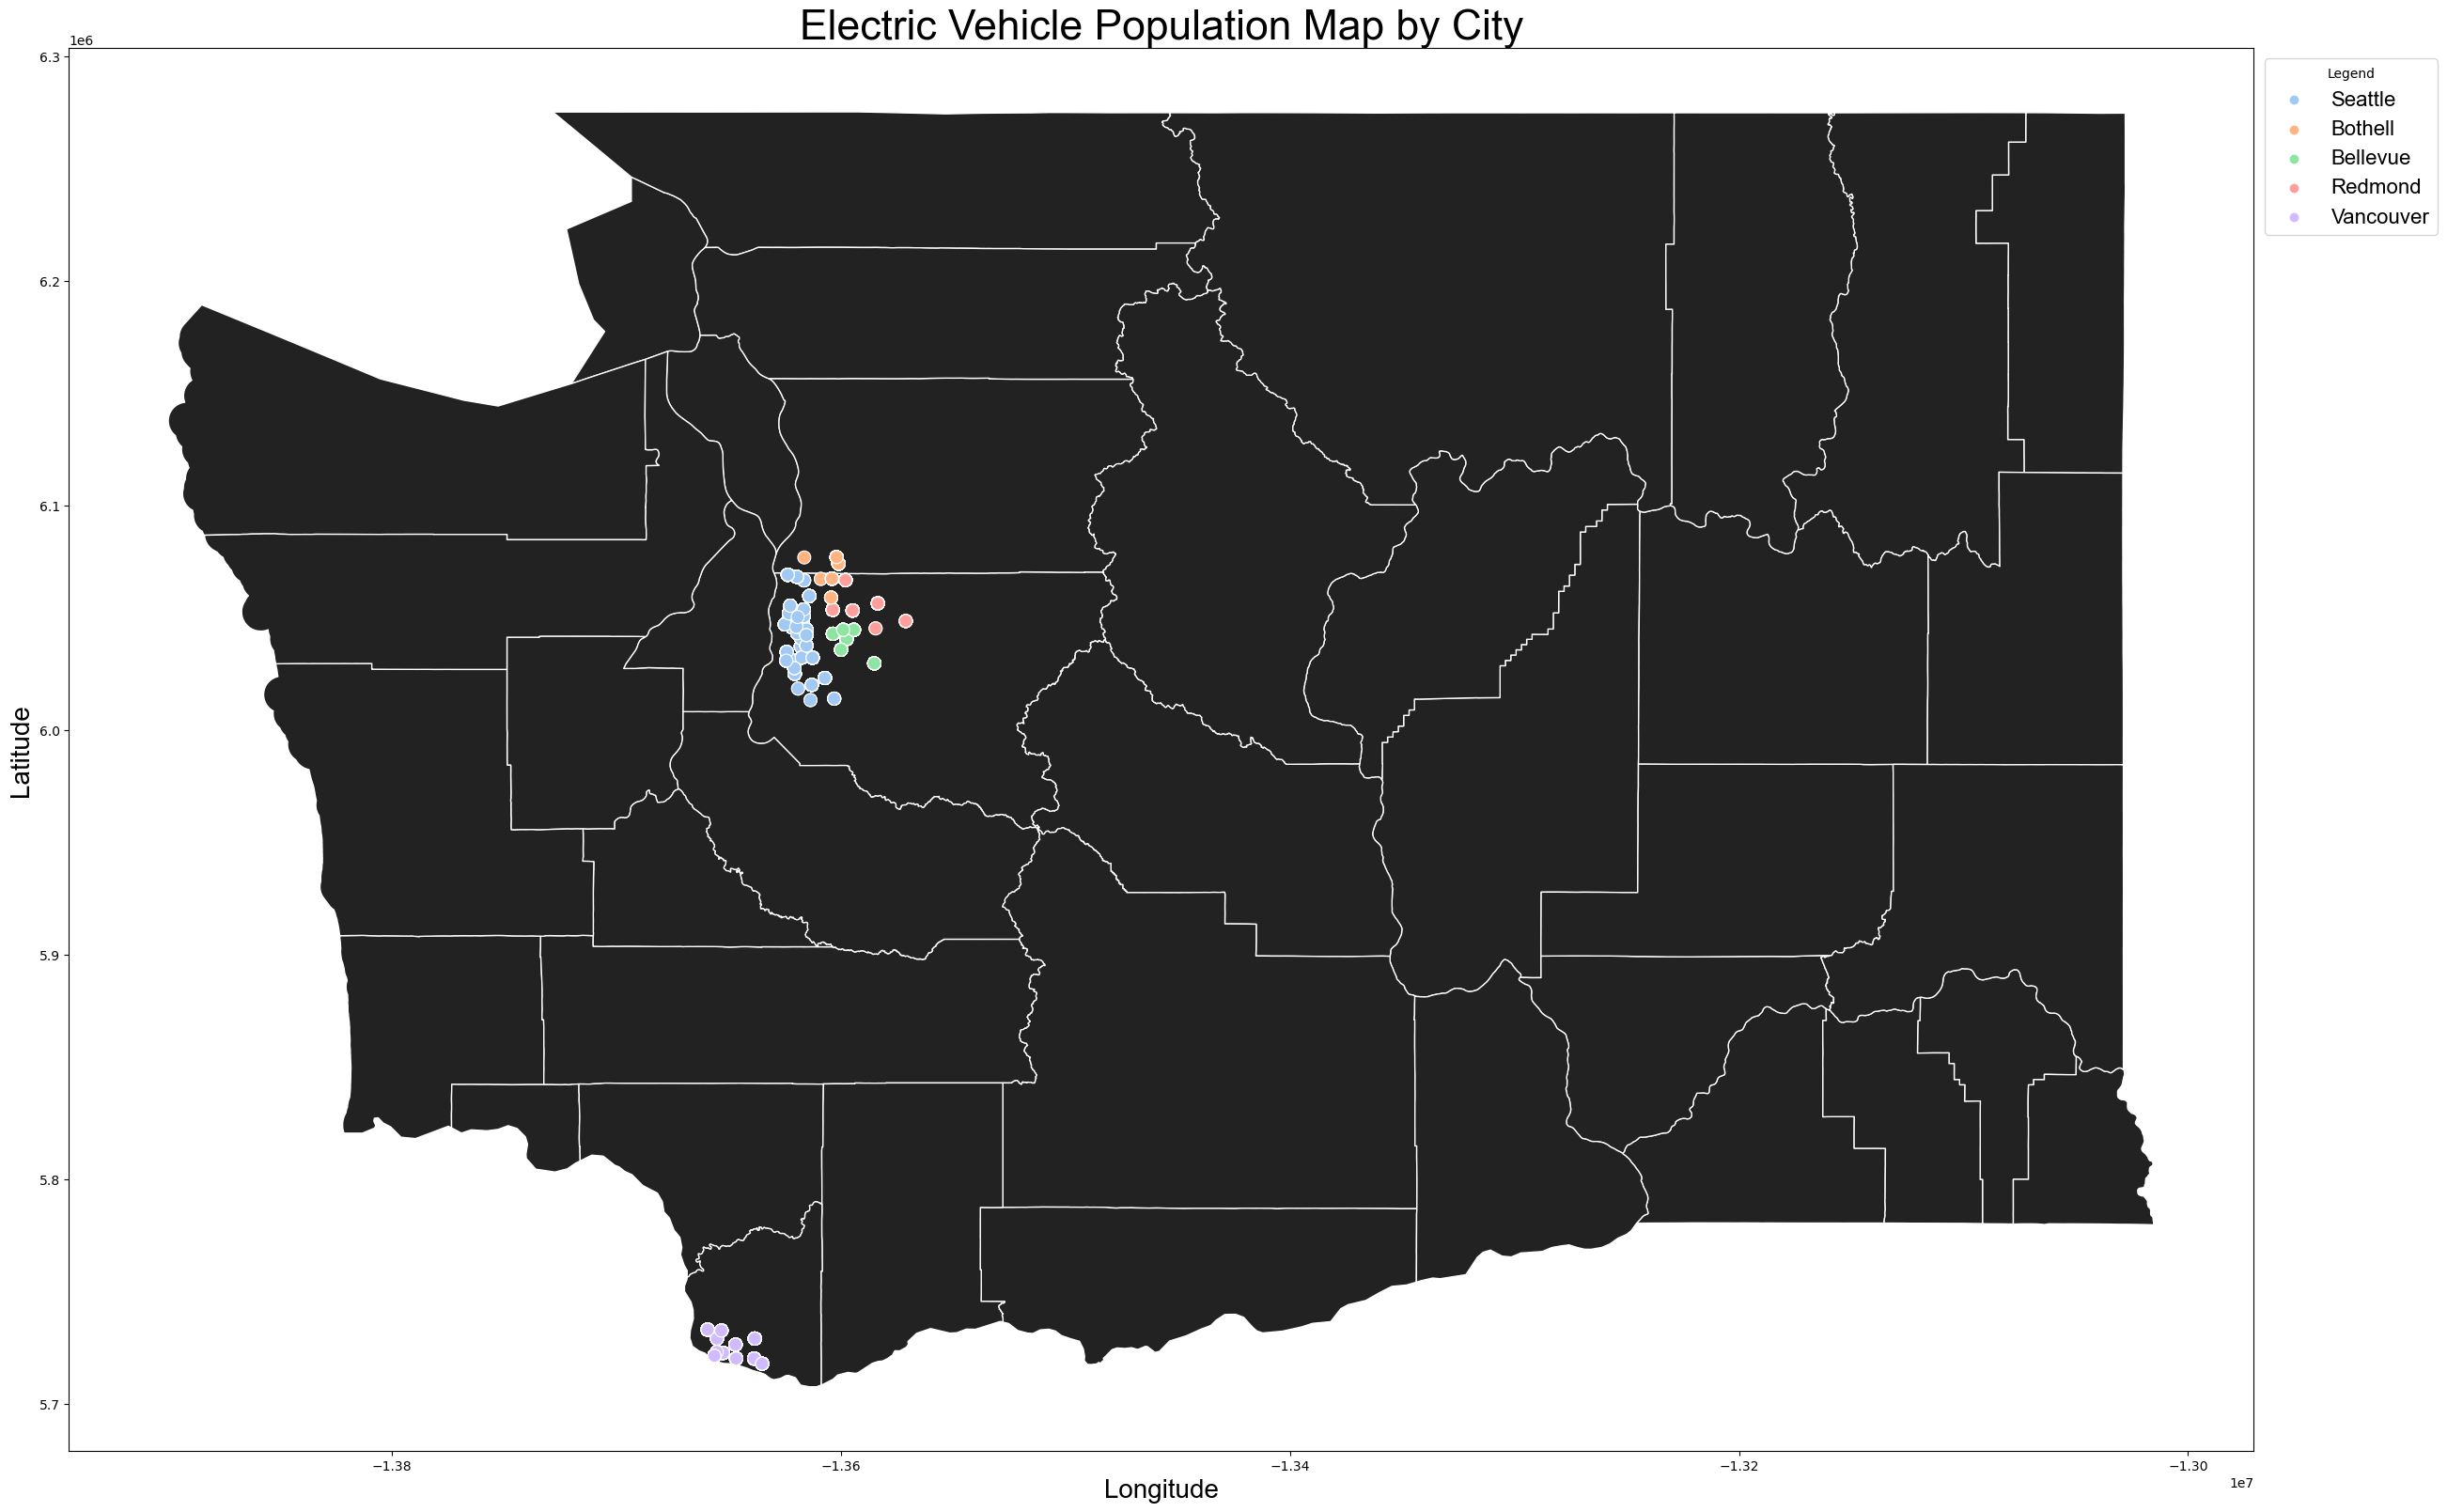

In [100]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from geopandas import GeoDataFrame

# Read the shapefile
shapefile = gpd.read_file('WA_County_Boundaries.shp')

print("Shapefile CRS:", shapefile.crs)

geometry = [Point(xy) for xy in zip(top_cities_df['longitude'], top_cities_df['latitude'])]
scatter_gdf = GeoDataFrame(top_cities_df, geometry=geometry)

print("Scatterplot Data CRS (before):", scatter_gdf.crs)

scatter_gdf.crs = "EPSG:4326"

scatter_gdf = scatter_gdf.to_crs(shapefile.crs)

print("Scatterplot Data CRS (after):", scatter_gdf.crs)

scatter_gdf['x'] = scatter_gdf['geometry'].x
scatter_gdf['y'] = scatter_gdf['geometry'].y

# Plot the shapefile
ax = shapefile.plot(figsize=(30, 26), facecolor = "#222222", edgecolor = "white")

# Plot the scatterplot data, customizing color and size based on "Electric Range"
sns.scatterplot(x='x', y='y', hue="City", data=scatter_gdf, palette='pastel', s = 100, legend='brief', ax=ax)

# Add legend
label_font = {'family': 'Arial', 'size': 18}
title_font = {'family': 'Arial', 'size': 56}
legend_font = title_font = {'family': 'Arial', 'size': 16}
plt.legend(title="Legend", loc='upper left', bbox_to_anchor=(1, 1), prop=legend_font)
plt.title("Electric Vehicle Population Map of the Top 5 Cities", fontdict=title_font,fontsize = 32)
plt.gca().set_xlabel('Longitude', fontdict=label_font, fontsize=20)
plt.gca().set_ylabel('Latitude', fontdict=label_font, fontsize=20)

plt.show()